## **DS223 Marketing Analytics | Homework 4 | Social Network Analysis**

In [3]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from infomap import Infomap
from operator import itemgetter

### **1. Create a Directed graph.**

In [5]:
G = nx.read_edgelist('connections.txt', create_using=nx.DiGraph(), nodetype=int)

### **2. Show which nodes are bridges.**

In [6]:
betweenness_cent = nx.betweenness_centrality(G)
max_betweenness = max(betweenness_cent.values())
bridge_nodes = [i for i, j in betweenness_cent.items() if j == max_betweenness]

In [7]:
bridge_nodes

[1684]

Only bridge node is found to be 1684.

### **3. Show the density of the graph. Comment about your findings.**

In [8]:
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

print(f'Number of nodes: {num_nodes}')
print(f'Number of edges: {num_edges}')

Number of nodes: 4039
Number of edges: 88234


In [9]:
density = num_edges / (num_nodes * (num_nodes - 1))

print(f'Density of the graph: {density}')

Density of the graph: 0.0054099817517196435


The density value is quite close to zero, indicating that the graph is relatively sparse.

### **4. Show which nodes have the highest and lowest number of connections.**

In [18]:
total_degrees = dict(G.degree())

# Finding nodes with the highest and lowest total degrees
max_total_degree_node = max(total_degrees, key=total_degrees.get)
min_total_degree_node = min(total_degrees, key=total_degrees.get)

print(f"Node with the highest total degree: {max_total_degree_node} (Total degree: {total_degrees[max_total_degree_node]})")
print(f"Node with the lowest total degree: {min_total_degree_node} (Total degree: {total_degrees[min_total_degree_node]})")

Node with the highest total degree: 107 (Total degree: 1045)
Node with the lowest total degree: 11 (Total degree: 1)


### **5. Show which nodes have the highest incoming and outgoing connections.**

In [20]:
in_degrees = dict(G.in_degree())
out_degrees = dict(G.out_degree())

# Finding nodes with the highest and lowest in-degrees
max_in_degree_node = max(in_degrees, key=in_degrees.get)
min_in_degree_node = min(in_degrees, key=in_degrees.get)

# Finding nodes with the highest and lowest out-degrees
max_out_degree_node = max(out_degrees, key=out_degrees.get)
min_out_degree_node = min(out_degrees, key=out_degrees.get)

print(f"Node with the highest in-degree: {max_in_degree_node} (In-degree: {in_degrees[max_in_degree_node]})")
print(f"Node with the lowest in-degree: {min_in_degree_node} (In-degree: {in_degrees[min_in_degree_node]})")
print(f"Node with the highest out-degree: {max_out_degree_node} (Out-degree: {out_degrees[max_out_degree_node]})")
print(f"Node with the lowest out-degree: {min_out_degree_node} (Out-degree: {out_degrees[min_out_degree_node]})")

Node with the highest in-degree: 1888 (In-degree: 251)
Node with the lowest in-degree: 0 (In-degree: 0)
Node with the highest out-degree: 107 (Out-degree: 1043)
Node with the lowest out-degree: 11 (Out-degree: 0)


### **6. Show which nodes have the highest closeness, betweenness, and eigenvector. | Interpret your findings.**

In [22]:
closeness_dict = nx.closeness_centrality(G)
betweenness_dict = nx.betweenness_centrality(G)
eigenvector_dict = nx.eigenvector_centrality(G, max_iter=500)

# Finding nodes with the highest centrality values
max_closeness_node = max(closeness_dict, key=closeness_dict.get)
max_betweenness_node = max(betweenness_dict, key=betweenness_dict.get)
max_eigenvector_node = max(eigenvector_dict, key=eigenvector_dict.get)

print(f"Node with the highest closeness centrality: {max_closeness_node} (Closeness Centrality: {closeness_dict[max_closeness_node]:.5f})")
print(f"Node with the highest betweenness centrality: {max_betweenness_node} (Betweenness Centrality: {betweenness_dict[max_betweenness_node]:.5f})")
print(f"Node with the highest eigenvector centrality: {max_eigenvector_node} (Eigenvector Centrality: {eigenvector_dict[max_eigenvector_node]:.5f})")

Node with the highest closeness centrality: 2642 (Closeness Centrality: 0.11798)
Node with the highest betweenness centrality: 1684 (Betweenness Centrality: 0.03300)
Node with the highest eigenvector centrality: 2655 (Eigenvector Centrality: 0.80270)


Node 2642 is, on average, closer to all other nodes in the network compared to other nodes. This suggests that it can quickly interact with a large portion of the network.

Node 1684 plays a important role in controlling the flow of information between other nodes. It lies on a significant number of shortest paths between pairs of nodes, making it important for maintaining network connectivity.

Node 2655 is influential in the network because it is well-connected to other nodes that are themselves well-connected. Its centrality is not only based on the number of connections but also on the quality of those connections within the network.

### **7. Implement a community detection algorithm on the directed graph and show how many communities were created.**

In [26]:
def find_communities(graph):
    infomap = Infomap("--two-level --directed")

    print("Constructing Infomap network from a NetworkX graph...")

    for edge in graph.edges():
        infomap.addLink(*edge)

    print("Discovering communities with Infomap...")
    infomap.run()

    print(f"Detected {infomap.num_top_modules} communities")

    communities = {}
    for node in infomap.tree:
        communities[node.node_id] = node.module_id

    nx.set_node_attributes(graph, communities, 'community')

    return infomap

In [27]:
infmap = find_communities(G)
print(infmap)

Constructing Infomap network from a NetworkX graph...
Discovering communities with Infomap...
Detected 93 communities
<infomap.Infomap; proxy of <Swig Object of type 'infomap::InfomapWrapper *' at 0x7912b8910ed0> >


### **8. Show the largest and the smallest community. | Interpret your findings.**

In [28]:
community_cnts = {i:0 for i in range(1,94)}
for k, j in G.nodes.items():
    community_cnts[j['community']] += 1

In [29]:
community_cnts

{1: 237,
 2: 336,
 3: 20,
 4: 471,
 5: 226,
 6: 27,
 7: 167,
 8: 238,
 9: 235,
 10: 164,
 11: 89,
 12: 73,
 13: 199,
 14: 141,
 15: 149,
 16: 12,
 17: 137,
 18: 111,
 19: 38,
 20: 52,
 21: 14,
 22: 49,
 23: 34,
 24: 54,
 25: 25,
 26: 21,
 27: 19,
 28: 21,
 29: 30,
 30: 36,
 31: 57,
 32: 32,
 33: 19,
 34: 19,
 35: 22,
 36: 19,
 37: 29,
 38: 19,
 39: 14,
 40: 13,
 41: 25,
 42: 7,
 43: 16,
 44: 18,
 45: 15,
 46: 9,
 47: 15,
 48: 10,
 49: 10,
 50: 4,
 51: 7,
 52: 12,
 53: 5,
 54: 14,
 55: 8,
 56: 10,
 57: 9,
 58: 13,
 59: 9,
 60: 8,
 61: 1,
 62: 6,
 63: 8,
 64: 12,
 65: 22,
 66: 6,
 67: 3,
 68: 7,
 69: 2,
 70: 6,
 71: 4,
 72: 5,
 73: 6,
 74: 3,
 75: 6,
 76: 6,
 77: 4,
 78: 3,
 79: 3,
 80: 3,
 81: 3,
 82: 2,
 83: 3,
 84: 2,
 85: 3,
 86: 3,
 87: 2,
 88: 2,
 89: 2,
 90: 2,
 91: 2,
 92: 2,
 93: 3}

In [30]:
sorted_communities = {i: j for i, j in sorted(community_cnts.items(), key=lambda item: item[1])}

In [31]:
sorted_communities

{61: 1,
 69: 2,
 82: 2,
 84: 2,
 87: 2,
 88: 2,
 89: 2,
 90: 2,
 91: 2,
 92: 2,
 67: 3,
 74: 3,
 78: 3,
 79: 3,
 80: 3,
 81: 3,
 83: 3,
 85: 3,
 86: 3,
 93: 3,
 50: 4,
 71: 4,
 77: 4,
 53: 5,
 72: 5,
 62: 6,
 66: 6,
 70: 6,
 73: 6,
 75: 6,
 76: 6,
 42: 7,
 51: 7,
 68: 7,
 55: 8,
 60: 8,
 63: 8,
 46: 9,
 57: 9,
 59: 9,
 48: 10,
 49: 10,
 56: 10,
 16: 12,
 52: 12,
 64: 12,
 40: 13,
 58: 13,
 21: 14,
 39: 14,
 54: 14,
 45: 15,
 47: 15,
 43: 16,
 44: 18,
 27: 19,
 33: 19,
 34: 19,
 36: 19,
 38: 19,
 3: 20,
 26: 21,
 28: 21,
 35: 22,
 65: 22,
 25: 25,
 41: 25,
 6: 27,
 37: 29,
 29: 30,
 32: 32,
 23: 34,
 30: 36,
 19: 38,
 22: 49,
 20: 52,
 24: 54,
 31: 57,
 12: 73,
 11: 89,
 18: 111,
 17: 137,
 14: 141,
 15: 149,
 10: 164,
 7: 167,
 13: 199,
 5: 226,
 9: 235,
 1: 237,
 8: 238,
 2: 336,
 4: 471}

The smallest community was found to be the 61st one, and the largest community is the 4th one.

### **9. Select the largest three communities and draw them. After doing so, remove the top 3 nodes with the highest Degree Centrality, Closeness Centrality, Betweenness Centrality, and Eigenvector. Each should be in a separate plot/draw.**

As it is presented in the previous results, the top largest 3 communities are: 4, 2, 8. Now we will focus on them.

In [35]:
com_4  = dict((i, j['community']) for i, j in G.nodes().items() if j['community'] == 4)
com_2  = dict((i, j['community']) for i, j in G.nodes().items() if j['community'] == 2)
com_8  = dict((i, j['community']) for i, j in G.nodes().items() if j['community'] == 8)

In [36]:
s_4 = G.subgraph(list(com_4.keys()))
s_2 = G.subgraph(list(com_2.keys()))
s_8 = G.subgraph(list(com_8.keys()))

Graph of the 4th community:

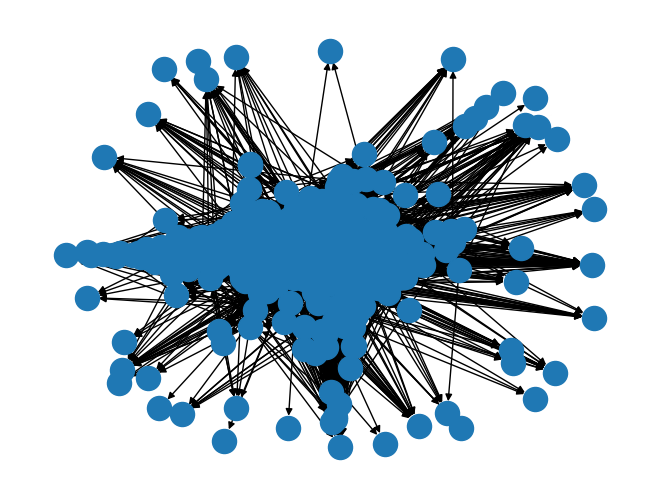

In [37]:
nx.draw(s_4, pos=nx.spring_layout(s_4, seed=22))

Graph of the 2nd community:

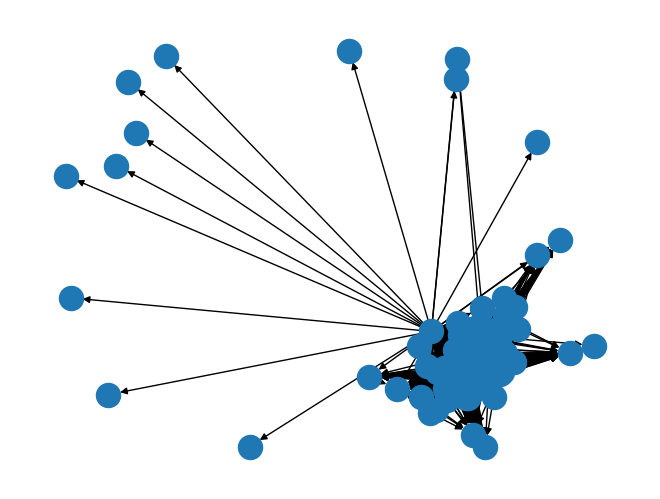

In [38]:
nx.draw(s_2, pos=nx.spring_layout(s_2, seed=22))

Graph of the 8th community:

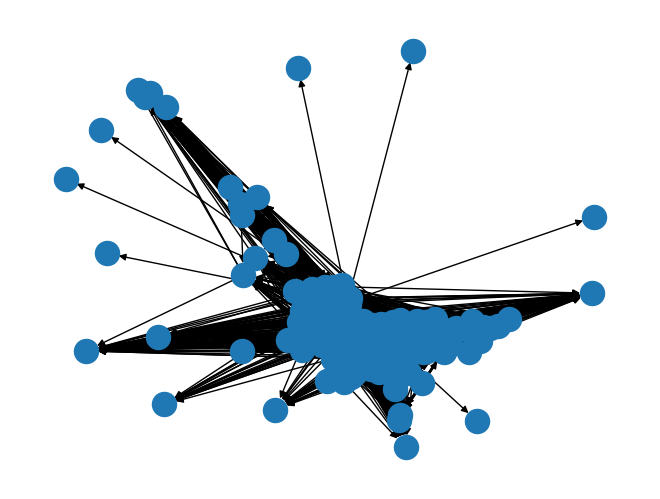

In [39]:
nx.draw(s_8, pos=nx.spring_layout(s_8, seed=22))

For the 4th community:

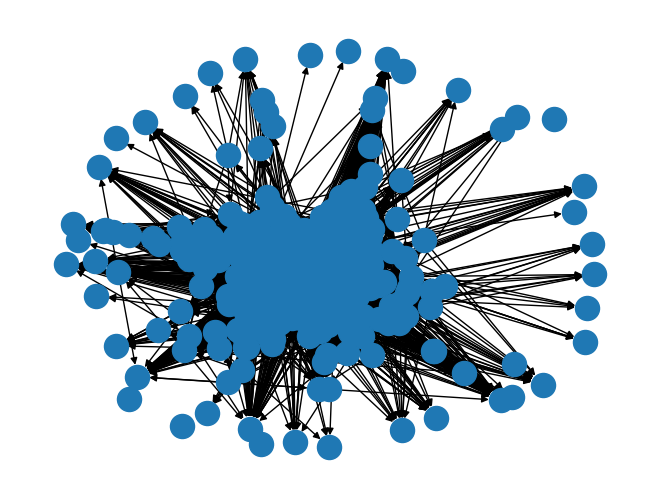

In [43]:
betweenness_d = nx.betweenness_centrality(s_4)
nx.set_node_attributes(s_4, betweenness_d, 'betweenness')
sorted_betweenness = sorted(betweenness_d.items(), key=itemgetter(1), reverse=True)
top3b=[tup[0] for tup in sorted_betweenness][:3]

closeness_d = nx.closeness_centrality(s_4)
nx.set_node_attributes(s_4, closeness_d, 'closeness')
sorted_closeness = sorted(closeness_d.items(), key=itemgetter(1),reverse=True)
top3c=[tup[0] for tup in sorted_closeness][:3]

eigenvector_d = nx.eigenvector_centrality(s_4, max_iter=1000)
nx.set_node_attributes(s_4, eigenvector_d, 'eigen')
sorted_eigen = sorted(eigenvector_d.items(), key=itemgetter(1),reverse=True)
top3e=[tup[0] for tup in sorted_eigen][:3]
top3b.extend(top3c)
top3b.extend(top3e)
nodes_to_exclude = set(top3b)

list_4_exclude = [i for i in com_4.keys() if i not in nodes_to_exclude]

s_4_inf_removed = G.subgraph(list_4_exclude)
nx.draw(s_4_inf_removed, pos=nx.spring_layout(s_4_inf_removed, seed=22))

For the 2nd community:

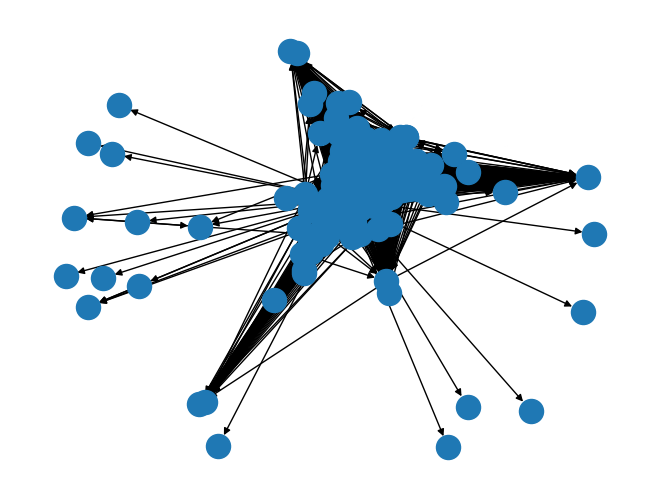

In [44]:
betweenness_d = nx.betweenness_centrality(s_2)
nx.set_node_attributes(s_2, betweenness_d, 'betweenness')
sorted_betweenness = sorted(betweenness_d.items(), key=itemgetter(1), reverse=True)
top3b=[tup[0] for tup in sorted_betweenness][:3]

closeness_d = nx.closeness_centrality(s_2)
nx.set_node_attributes(s_2, closeness_d, 'closeness')
sorted_closeness = sorted(closeness_d.items(), key=itemgetter(1),reverse=True)
top3c=[tup[0] for tup in sorted_closeness][:3]

eigenvector_d = nx.eigenvector_centrality(s_2, max_iter=1000)
nx.set_node_attributes(s_2, eigenvector_d, 'eigen')
sorted_eigen = sorted(eigenvector_d.items(), key=itemgetter(1),reverse=True)
top3e=[tup[0] for tup in sorted_eigen][:3]
top3b.extend(top3c)
top3b.extend(top3e)
nodes_to_exclude = set(top3b)

list_2_exclude = [i for i in com_2.keys() if i not in nodes_to_exclude]

s_2_inf_removed = G.subgraph(list_2_exclude)
nx.draw(s_2_inf_removed, pos=nx.spring_layout(s_2_inf_removed, seed=22))

For the 8th community:

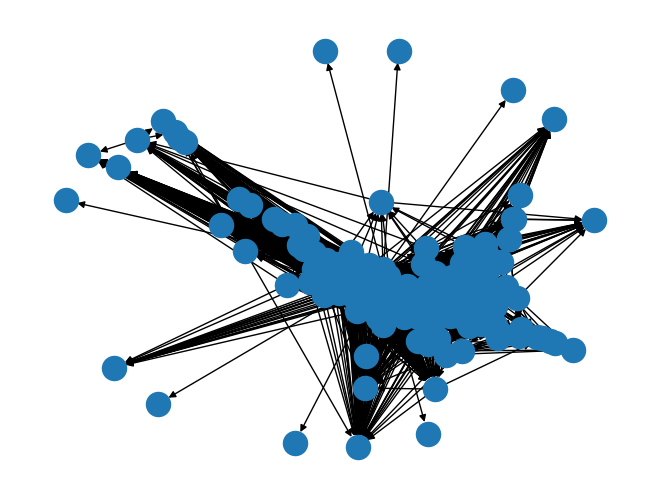

In [45]:
betweenness_d = nx.betweenness_centrality(s_8)
nx.set_node_attributes(s_8, betweenness_d, 'betweenness')
sorted_betweenness = sorted(betweenness_d.items(), key=itemgetter(1), reverse=True)
top3b=[tup[0] for tup in sorted_betweenness][:3]

closeness_d = nx.closeness_centrality(s_8)
nx.set_node_attributes(s_8, closeness_d, 'closeness')
sorted_closeness = sorted(closeness_d.items(), key=itemgetter(1),reverse=True)
top3c=[tup[0] for tup in sorted_closeness][:3]

eigenvector_d = nx.eigenvector_centrality(s_8, max_iter=1000)
nx.set_node_attributes(s_8, eigenvector_d, 'eigen')
sorted_eigen = sorted(eigenvector_d.items(), key=itemgetter(1),reverse=True)
top3e=[tup[0] for tup in sorted_eigen][:3]
top3b.extend(top3c)
top3b.extend(top3e)
nodes_to_exclude = set(top3b)

list_4_exclude = [i for i in com_8.keys() if i not in nodes_to_exclude]

s_8_inf_removed = G.subgraph(list_4_exclude)
nx.draw(s_8_inf_removed, pos=nx.spring_layout(s_8_inf_removed, seed=22))

It can be seen that some nodes have been removed from the graph, however, it is visibly challenging to observe it.

### **10. Draw the influencers of those top 3 communities.**

Because among all centralities eigenvector centrality measures a node's importance based on the importance of its neighbors, let's define the influencers based on eigenvector centrality.

For the 4th community:

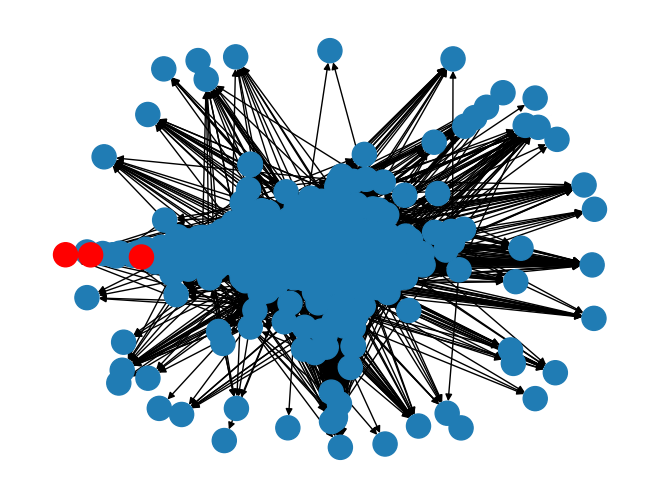

In [46]:
eigenvector_dict = nx.eigenvector_centrality(s_4, max_iter=1000)
nx.set_node_attributes(s_4, eigenvector_dict, 'eigen')
sorted_eigen = sorted(eigenvector_dict.items(), key=itemgetter(1),reverse=True)
top3=[tup[0] for tup in sorted_eigen][:3]
color_map= ['red' if node in top3 else '#207cb4' for node in s_4]

nx.draw(s_4, pos=nx.spring_layout(s_4, seed=22), node_color=color_map, with_labels=False)

For the 2nd community:

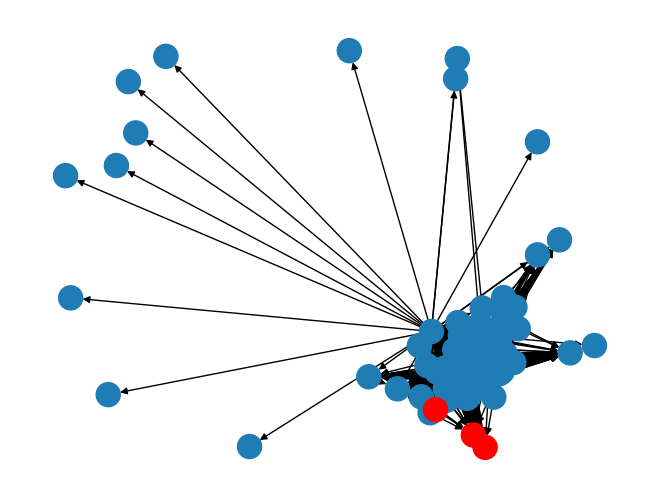

In [47]:
eigenvector_dict = nx.eigenvector_centrality(s_2, max_iter=1000)
nx.set_node_attributes(s_2, eigenvector_dict, 'eigen')
sorted_eigen = sorted(eigenvector_dict.items(), key=itemgetter(1),reverse=True)
top3=[tup[0] for tup in sorted_eigen][:3]
color_map= ['red' if node in top3 else '#207cb4' for node in s_2]

nx.draw(s_2, pos=nx.spring_layout(s_2, seed=22), node_color=color_map, with_labels=False)

For the 8th community:

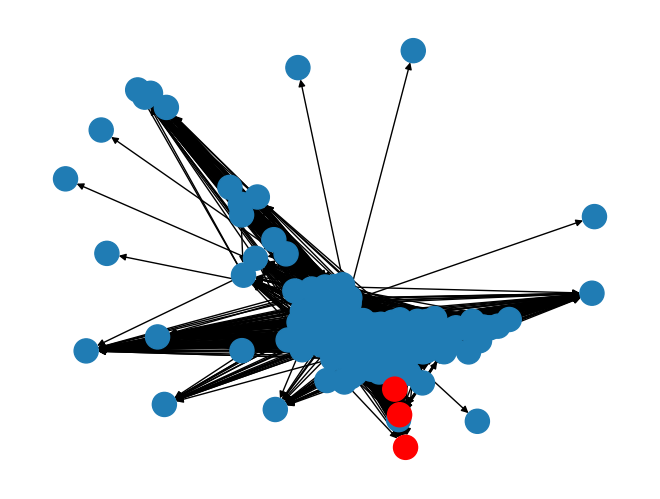

In [48]:
eigenvector_dict = nx.eigenvector_centrality(s_8, max_iter=1000)
nx.set_node_attributes(s_8, eigenvector_dict, 'eigen')
sorted_eigen = sorted(eigenvector_dict.items(), key=itemgetter(1),reverse=True)
top3=[tup[0] for tup in sorted_eigen][:3]
color_map= ['red' if node in top3 else '#207cb4' for node in s_8]

nx.draw(s_8, pos=nx.spring_layout(s_8, seed=22), node_color=color_map, with_labels=False)

#### **11. Action Plan:**

If we take telecom industry as an example, the plan may potentially look like the following:

The primary objective is to identify and engage with the most significant communities, recognizing that larger communities lead to increased revenue potential. Following this, the next step is to shift the focus on identifying and approaching the influencers of those communities, one way of which is contacting each influencer, engaging in negotiations to determine advertising costs. In general, it is important to strategically decide on engagements based on the company's budget to maximize business outcomes. In summary, the overall strategy revolves around targeting large communities through effective collaboration with their influencers.